In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import matplotlib
from matplotlib import patheffects

import seaborn as sns

_30k_main_palette_dict = {
    "blue": "#202F66",
    "orange": "#FF7048",
    "purple": "#8B87EA",
    "pink": "#D869AB",
    "cyan": "#54C9B9",
    "yellow": "#F3D36E",
}

_30k_danger_safe_palette_dict = {
    "danger": "#FF4F72",
    "safe": "#58EDB9",
}

_30k_text_palette_dict = {
    "text_black": "#32363A",
    "text_lighter1": "#6F7273",
    "text_lighter2": "#8B8E8F",
    "bg_cream": "#FAF7F4"
}

_font_mono = "Inconsolata"
_font_serif = "Canela Text"
_font_sans = "Gill Sans"

plt.style.use("./utils/-30k.mplstyle")

_30k = list(_30k_main_palette_dict.values())
sns.set_palette(_30k)
# ← → ↓ ↑


import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize.util import is_cjk
import re

In [2]:
import string

In [3]:
typeable = list(string.printable)
alphabet = string.ascii_letters + "".join([str(i) for i in range(0, 10)])

def count_typeable(text, typeable):
    cnt = 0
    for c in text:
        if c in typeable:
            cnt += 1
    return cnt

def count_cjk(text):
    cnt = 0
    for c in text:
        if is_cjk(c):
            cnt += 1
    return cnt

def count_alpha(text, alphabet):
    cnt = 0
    for c in text:
        if c in alphabet:
            cnt += 1
    return cnt

def plot_heatmap(result):
    colours = ['#e3e5e7',
              _30k_main_palette_dict['yellow'],
               _30k_danger_safe_palette_dict['safe']
              ]
    value = [result['score']]
    
    if result['status']:
        annot = [list(result['guessed word'])]
    else:
        annot = [list(result['answer'])]
        
    if result['#guess'] > result['max #guess']:
        annot = [list(result['answer'])]
    print(''.join(annot[0]))
    sns.heatmap(value, vmin=0, vmax=2, 
            cmap=colours, 
            cbar=False, square=True, linewidths=2,
            annot=annot, fmt='', annot_kws={"fontsize": 14, "fontweight": "bold"}
           )
    
    plt.title(f"{result['#guess']}/{result['max #guess']}, status_is_OK?: {(result['status'])}")
    plt.xticks([], [])
    plt.yticks([], [])

In [4]:
df = pd.read_csv("./data/sawano_tracklist.csv")

# only y+
year = 2010
df = df[df['year'] >= year]

In [5]:
df['length'] = df['track_name'].apply(len)
df['typeable'] = df['track_name'].apply(lambda x: count_typeable(x, typeable))
df['cjk'] = df['track_name'].apply(lambda x: count_cjk(x))
df['alphabet'] = df['track_name'].apply(lambda x: count_alpha(x, alphabet))
df['non_typeable'] = df['length'] - df['typeable']
df['typeable_ratio'] = np.round(df['typeable']/df['length'], 2)

In [6]:
# filter only valid length
df = df[(df['length'] >= 4) & (df['length'] <= 25)]

In [7]:
df = df[(df['cjk']/df['length'] <= 0.3)]
df = df[(df['typeable'] + df['cjk'])/df['length'] >= 0.5]

In [8]:
df = df.drop_duplicates('track_name')
df

,track_name,album_single,year,nZk,vocalist,length,typeable,cjk,alphabet,non_typeable,typeable_ratio
518,Welcome to my Land,彼岸島,2010,0,NaN,18,18,0,15,0,1.00
519,Versus,彼岸島,2010,0,NaN,6,6,0,6,0,1.00
520,RAID ON A FORT,彼岸島,2010,0,NaN,14,14,0,11,0,1.00
521,RAIKI,彼岸島,2010,0,NaN,5,5,0,5,0,1.00
522,the moment to decide,彼岸島,2010,0,NaN,20,20,0,17,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...
1798,Felidae <iv-ver.>,iv,2021,1,Gemie,17,17,0,12,0,1.00
1802,OUT OF “iv”,iv,2021,0,NaN,11,9,0,7,2,0.82
1803,Barricades <MODv>,iv,2021,1,Yosh,17,17,0,14,0,1.00
1804,Keep on keeping on <MODv>,iv,2021,1,mizuki,25,25,0,19,0,1.00


In [9]:
with open("./data/Sawano Selected Track.txt", "w") as f:
    f.writelines([line+"\n" for line in df['track_name'].drop_duplicates()])

In [10]:
non_typeable = ""
for track in df['track_name']:
    for c in track:
        if c not in typeable and c not in non_typeable:
            non_typeable += c 
non_typeable

'～♂♀女ッ♪→○‐…§期€∃最叫乱∀×口弐交狂詩第二楽章：響エκёっ手リぉ℃母∪美＄タすⅡⅢⅣ祝・％ëα←壱əæάɪ立機óàˈ⇒äö城正時団闘質☆で朝臭珍丼屋é進撃巨人蛇ラ切ル◎昼裸寝聴る厭\xa0空∞零ア悲＠十★ヲ奇角銅鑼復活動广ネ日｜血宣華（）･罪再中加横浜ガ希まれぞらた会おう［］鬼＆【】ε科音克気甲上βίος⚡生弌仁燦志吾’標他件ゅ々火過多◯召Λʜᴇ燃焼石略説“”'

In [11]:
a = np.random.choice(list(non_typeable), 10, replace=False)
a

array(['“', '石', '加', '召', 'れ', 'ö', '略', '♪', 'う', '人'], dtype='<U1')

In [12]:
np.random.shuffle(a)
a

array(['石', '略', 'う', '召', '“', '加', '人', 'ö', '♪', 'れ'], dtype='<U1')

In [13]:
from utils.sawanoWordle import SWordle

In [14]:
wd = SWordle(df)

# fixed ans, update hint
wd.ans = '進撃gt20130218巨人'
wd.non_typeable_hint = wd.get_non_typeable_hint()
wd.ans

'進撃gt20130218巨人'

In [15]:
wd.get_hint()

{'total length': 14,
 'cjk': 4,
 'num': 8,
 'space': 0,
 'non_typeable': '科 ♪ β 撃 ο ＠ ッ 零 ᴇ 克 鑼 ä 巨 人 進 à 団 加 手'}

In [16]:
guess = "巨人pf20130629零撃"
len(guess)

14

巨人pf20130629零撃


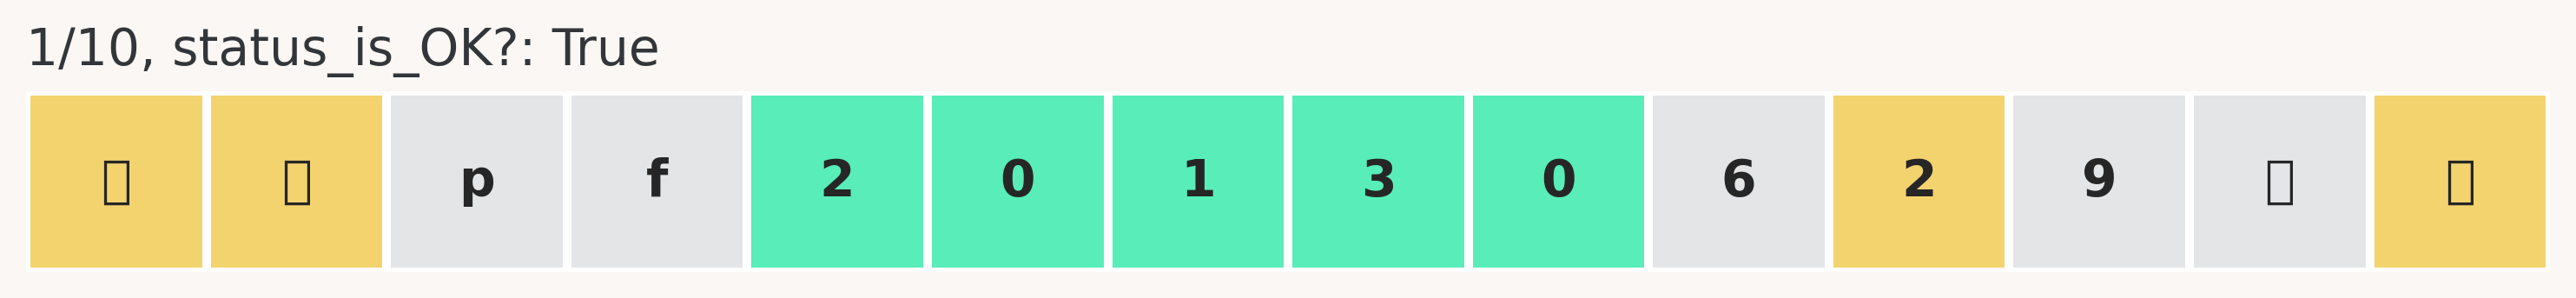

In [17]:
res = wd.guess(guess)
plot_heatmap(res)

In [18]:
guess = "動撃st20130218巨人"
len(guess)

14

動撃st20130218巨人


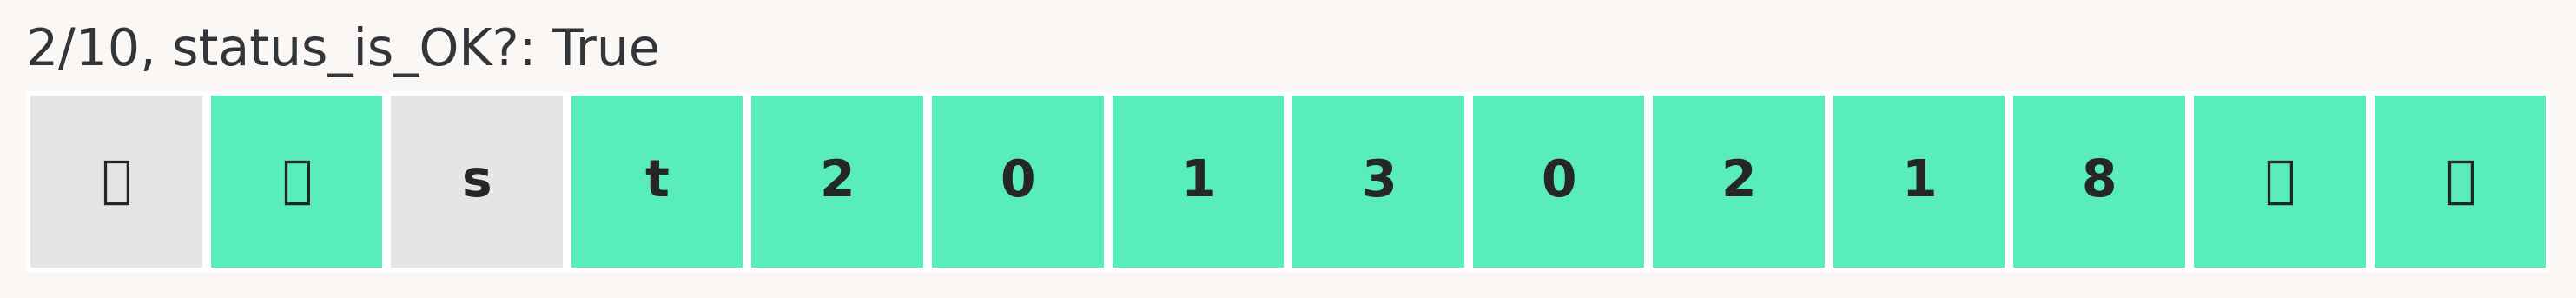

In [19]:
res = wd.guess(guess)
plot_heatmap(res)

In [20]:
guess = "進撃gt20130218巨人"
len(guess)

14

進撃gt20130218巨人


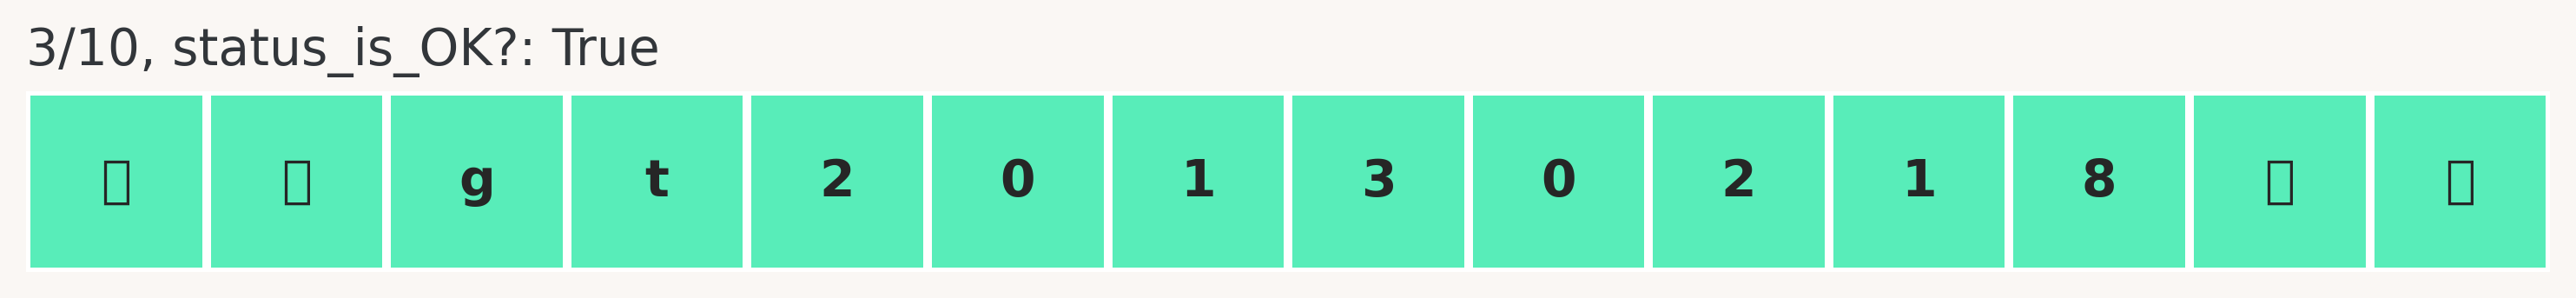

In [21]:
res = wd.guess(guess)
plot_heatmap(res)

In [22]:
wd = SWordle(df)

# fixed ans, update hint
wd.ans = '!”#$%＆’()0'
wd.non_typeable_hint = wd.get_non_typeable_hint()
wd.ans

'!”#$%＆’()0'

In [23]:
# wd.get_hint()

In [24]:
guess = "!@#$%^&*()"
len(guess)

10

!@#$%^&*()


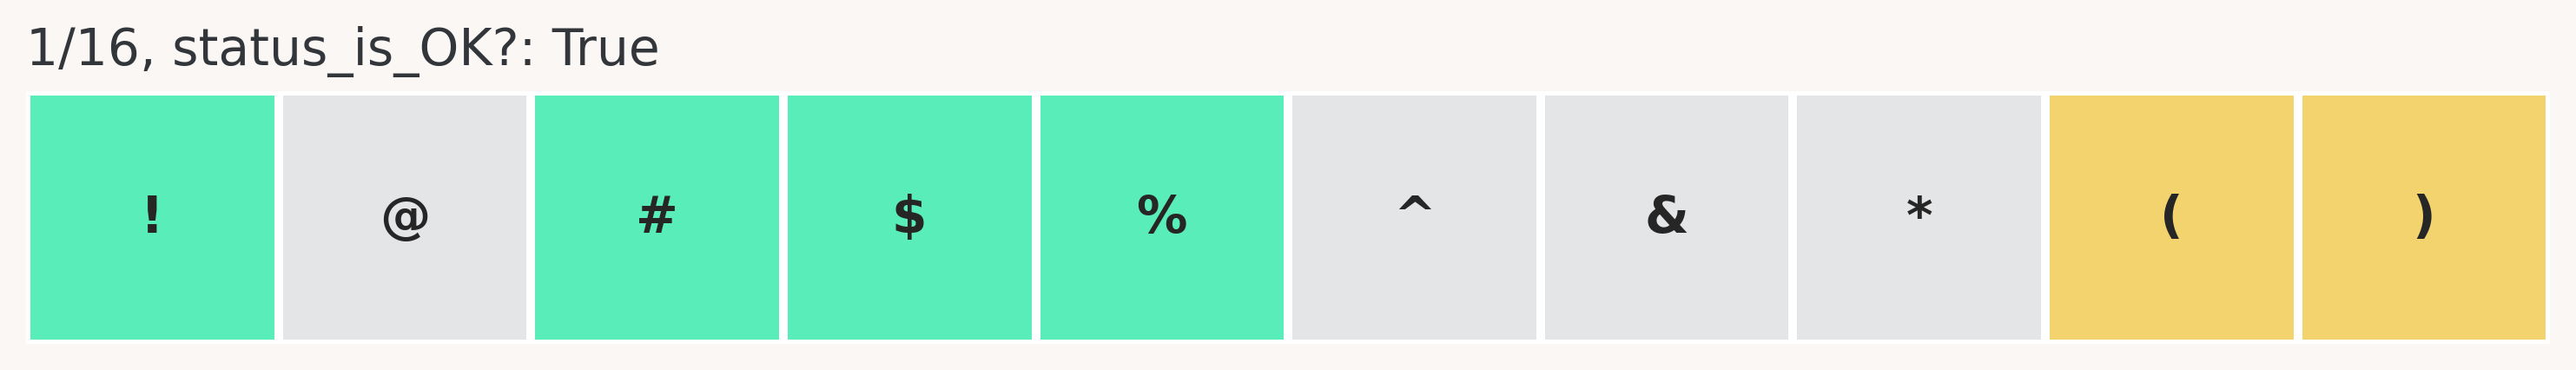

In [25]:
res = wd.guess(guess)
plot_heatmap(res)

In [26]:
guess = "!@#$%^?()0"
len(guess)

10

!@#$%^?()0


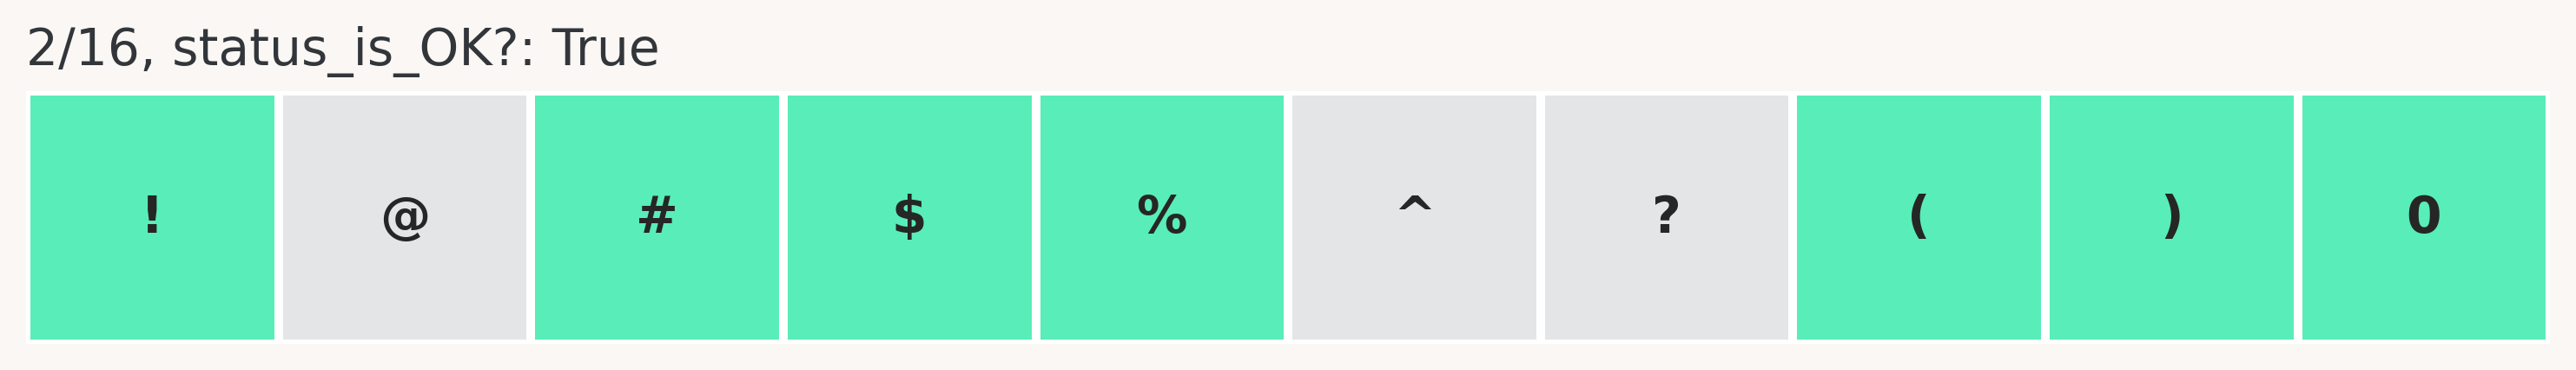

In [27]:
res = wd.guess(guess)
plot_heatmap(res)

In [28]:
guess = "!+#$%-=()0"
len(guess)

10

!+#$%-=()0


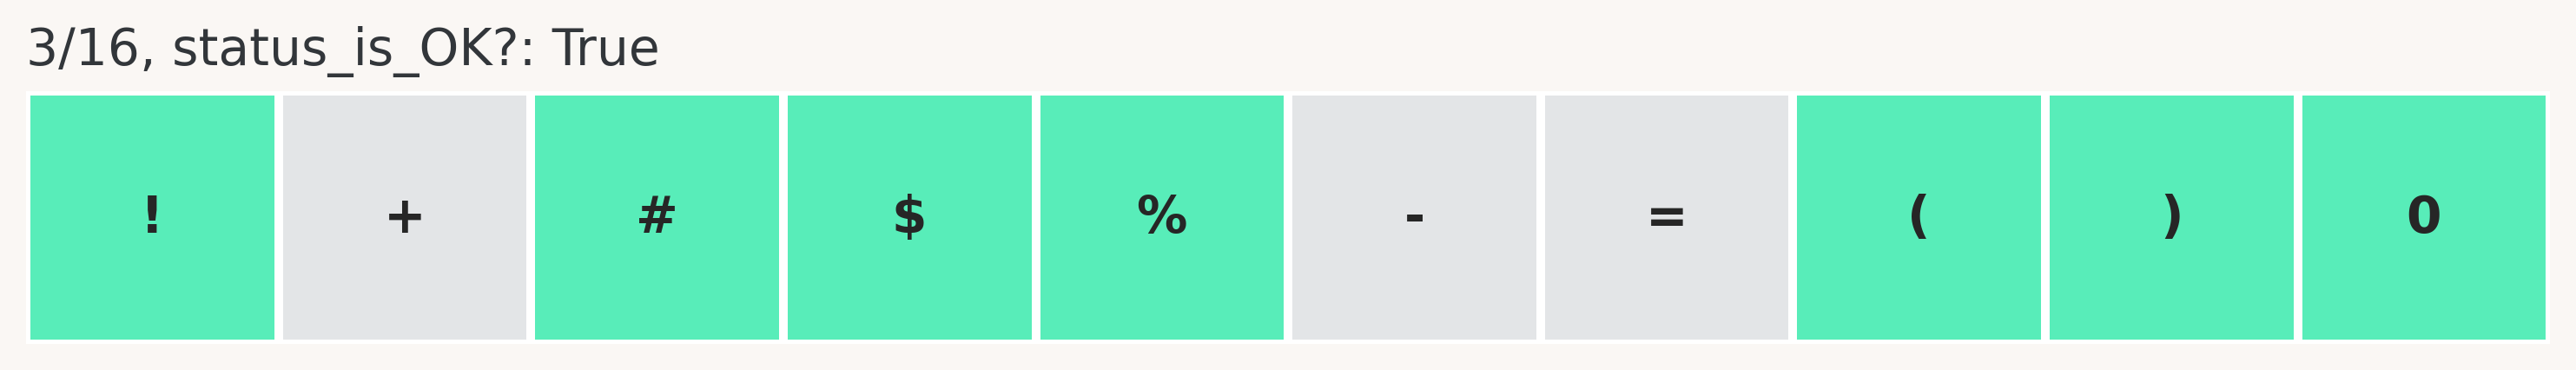

In [29]:
res = wd.guess(guess)
plot_heatmap(res)